Questo esercizio è una simulazione del modello di Ising in 1 dimensione con $N=50$ particelle di spin $\frac{1}{2}$.  
Siamo nell'insieme canonico (temperatura fissata data come parametro esterno).  
L'Hamiltoniana che descrive il sistema è:  
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-h\sum_{i=1}^N s_i 
$$
con $s_i$ segno dello spin della particella i-esima ($s_i\in\{-1; 1\}$) e usando la condizione periodica al contorno: $s_{N+1} = s_{1}$. h rappresenta il campo magnetico esterno (costante e uniforme).    
Nel nostro caso si è fissato $J=1$.  
L'Hamiltoniana scritta in questa forma assume di considerare le unità naturali in cui:  $\mu_B=1$, nel codice si è inoltre posto: $k_B=1$.

Facendo il calcolo si trova che la probabilità condizionale che la particella k-esima abbia un determinato spin (conoscendo gli spin delle altre particelle) è pari a:  
$$p(s_k=\pm 1|{s_j \ t.c. \ j\neq k})=\frac{1}{1+exp(\mp 2 \beta(J\sum_{i \ n.n. \ to \ k}s_i +h))}$$
Utilizzando questa probabilità per muovermi nello spazio delle fasi (spin) ho campionato tramite l'algoritmo di Gibbs le stime delle grandezze fisiche di mio interesse al variare della temperatura.

Poichè il sistema, se non vi sono input, inizializza gli spin con direzioni casuali, che è una configurazione che mi aspetterei se $T\rightarrow +\infty$, parto con la simulazione ad alte temperature. Finita questa, partendo dalle configurazioni dell'ultima simulazione eseguo la simulazione successiva abbassando la temperatura.  Itero il processo fino a quando non ho campionato tutte le temperature di mio interesse (nel nostro caso: $T\in \left[0.5;2.0\right]$).  
Per rendere automatico il processo ho scritto un codice in python (esecuzione.py) che esegue questo algoritmo e salva i file di mio interesse.

Le osservabili macroscopiche che sono state campionate sono:  
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

# 6.1

## salvataggio dati

In [47]:
# import matplotlib.pyplot as plt
# import numpy as np


# titol=["magnetization","specific_heat","susceptibility","total_energy"]
# camp=[0,0.02]
# metodi=["Gibbs","Metropolis"]


# # xx = np.arange(N)      # [0,1,2,...,N-1]
# # print (type(f))

# with open("./NSL_SIMULATOR/OUTPUT/magnetization.dat", 'r') as f:# con with il file si chiude da solo appena finito 
#     righe=f.read().split("\n")
#     # print(righe)
#     err=[]
#     x=[]
#     y=[]
#     y_av=[]
#     for i in righe:
#             if(i!=""):
#                 try:
#                     # print(i.split("\t"))
#                     a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
#                     # print(i)
#                     x.append(int(a))
#                     y.append(float(b))
#                     y_av.append(float(c))
#                     err.append(float(d))
#                 except ValueError:
#                     print(f"Il valore '{i}' non può essere convertito in float.")
# plt.errorbar(x,y_av,err)
# plt.xlabel('#blocks')
# plt.ylabel('<M>')
# plt.grid(True)
# plt.show()



# with open("./NSL_SIMULATOR/OUTPUT/specific_heat.dat", 'r') as f:# con with il file si chiude da solo appena finito 
#     righe=f.read().split("\n")
#     # print(righe)
#     err=[]
#     x=[]
#     y=[]
#     y_av=[]
#     for i in righe:
#             if(i!=""):
#                 try:
#                     # print(i.split("\t"))
#                     a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
#                     # print(i)
#                     x.append(int(a))
#                     y.append(float(b))
#                     y_av.append(float(c))
#                     err.append(float(d))
#                 except ValueError:
#                     print(f"Il valore '{i}' non può essere convertito in float.")

# # print(bl)
# plt.errorbar(x,y_av,err)
# plt.xlabel('#blocks')
# plt.ylabel('<C>')
# plt.grid(True)
# plt.show()

# with open("./NSL_SIMULATOR/OUTPUT/susceptibility.dat", 'r') as f:
#     righe=f.read().split("\n")
#     # print(righe)
#     err=[]
#     x=[]
#     y=[]
#     y_av=[]
#     for i in righe:
#             if(i!=""):
#                 try:
#                     # print(i.split("\t"))
#                     a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
#                     # print(i)
#                     x.append(int(a))
#                     y.append(float(b))
#                     y_av.append(float(c))
#                     err.append(float(d))
#                 except ValueError:
#                     print(f"Il valore '{i}' non può essere convertito in float.")

# # print(bl)
# plt.errorbar(x,y_av,err)
# plt.xlabel('#blocks')
# plt.ylabel(r'$\chi$')
# plt.grid(True)
# plt.show()



# with open("./NSL_SIMULATOR/OUTPUT/total_energy.dat", 'r') as f:
#     righe=f.read().split("\n")
#     # print(righe)
#     err=[]
#     x=[]
#     y=[]
#     y_av=[]
#     for i in righe:
#             if(i!=""):
#                 try:
#                     # print(i.split("\t"))
#                     a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
#                     # print(i)
#                     x.append(int(a))
#                     y.append(float(b))
#                     y_av.append(float(c))
#                     err.append(float(d))
#                 except ValueError:
#                     print(f"Il valore '{i}' non può essere convertito in float.")
# plt.errorbar(x,y_av,err)
# plt.xlabel('#blocks')
# plt.ylabel(r'$\frac{<U>}{N}$')
# plt.grid(True)
# plt.show()


In [52]:
import matplotlib.pyplot as plt
import numpy as np

titol=["magnetization","specific_heat","susceptibility","total_energy"]
camp=["h:0","h:0.02"]
metodi=["Gibbs","Metropolis"]
temp=[]

# Temp=2.
# while(Temp>=0.5):
#     temp.append(round(Temp,1))
#     Temp=round(Temp-0.1,1)
Temp=0.5
while(Temp<=2.):
    temp.append(round(Temp,1))# vettore con tutte le temperature
    Temp=round(Temp+0.1,1)
# print(Temp)

#titolo-campo-metodi-temperatura e ogni temperatura ha un array
ERR=[]
X=[]
Y=[]
Y_AV=[]

# A: titolo
# B: campo
# C:metodi


A=0
for i in titol:
    B=0
    X.append([])
    Y.append([])
    Y_AV.append([])
    ERR.append([])
    for j in camp:
        C=0
        X[A].append([])
        Y[A].append([])
        Y_AV[A].append([])
        ERR[A].append([])
        
        for k in metodi:
            X[A][B].append([])
            Y[A][B].append([])
            Y_AV[A][B].append([])
            ERR[A][B].append([])
            for l in temp:
                with open(f"./{i}/{j}/{k}/{i}_T:{l}.dat", 'r') as f:# con with il file si chiude da solo appena finito 
                    # print(f"./{i}/{j}/{k}/{i}_T:{l}.dat")
                    righe=f.read().split("\n")
                    # print(righe)
                    err=[]
                    x=[]
                    y=[]
                    y_av=[]
                    for m in righe:
                            if(m!=""):
                                try:
                                    # print(m.split("\t"))
                                    a,b,c,d=m.split() #split() separa se ho cose tra 1 o più spazi vuoti
                                    # print(a)
                                    # print(m)
                                    x.append(int(a))
                                    y.append(float(b))
                                    y_av.append(float(c))
                                    err.append(float(d))
                                except ValueError:
                                    print(f"Il valore '{m}' non può essere convertito in float.")
                X[A][B][C].append(x)
                Y[A][B][C].append(y)
                Y_AV[A][B][C].append(y_av)
                ERR[A][B][C].append(err)
                # plt.plot(x,y)
                # plt.xlabel('#blocks')
                # plt.ylabel('<M>')
                # plt.grid(True)
                # plt.show()
            C+=1
        B+=1
    A+=1
           


Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              ERROR:' non può essere convertito in float.
Il valore '    # BLOCK:          ACTUAL_M:          M_AVE:              

## grafici

### grafici insieme

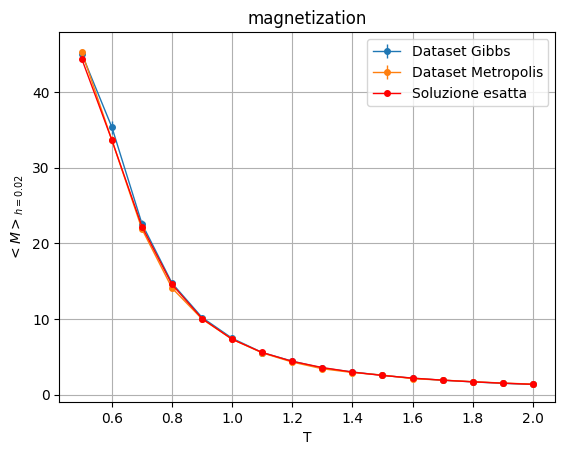

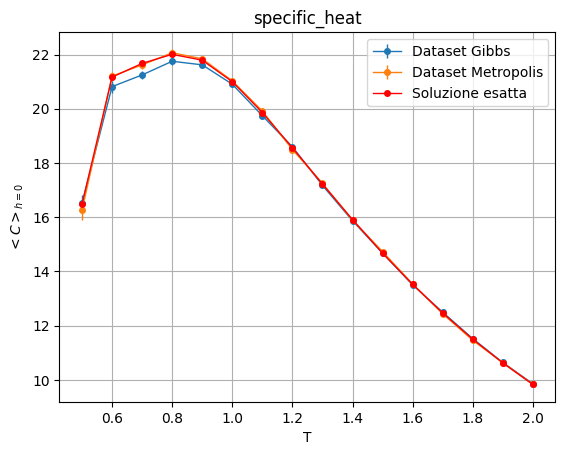

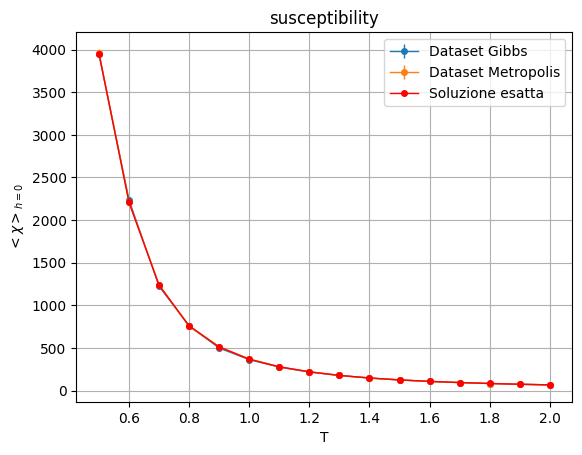

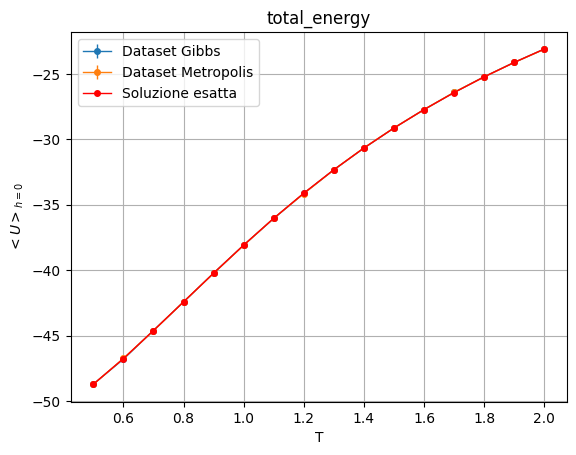

In [53]:
#da eseguire dopo il salvataggio dati

teo_plot=0  # mi serve per plottare una sola linea teorica per grafico

nblocchi=len(X[0][0][0][0])
# print(len(X[0][0][0][0]))
ntemp=len(temp)
x=[0]*ntemp
y_av=[0]*ntemp
err=[0]*ntemp

simboli=["<M>","<C>","<"+'\chi'+">","<U>"]
_h=["h=0","h=0.02"]
# A: titolo
# B: campo
# C:metodi
# D:temperature

A=0
for i in titol:
	B=0
	for j in camp:
		C=0
		for k in metodi:
			D=0
			for l in temp: # plotto solo la media finale
				x[D]=l 
				y_av[D]=Y_AV[A][B][C][D][nblocchi-1]
				err[D]=ERR[A][B][C][D][nblocchi-1]
				D+=1
			beta = 1/np.array(x)
			J = 1.0
			Ns = 50  #numero di particelle
			th = np.tanh(J/np.array(x))
			thN= th**Ns
			ch = 1/th

			if (_h[B]=="h=0.02" and i=="magnetization") or (_h[B]=="h=0" and i!="magnetization"):
				if (i=="magnetization"):
					h=0.02 #external field
					l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
					l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
					Z = l1**Ns + l2**Ns
					Prop = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
							+ (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)
					Prop=Prop*Ns # voglio confrontare con quello totale
				if (i=="specific_heat"):
					Prop=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
					Prop=Prop*Ns # voglio confrontare con quello totale
				if (i=="susceptibility"):
					Prop = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
					Prop=Prop*Ns  
				if (i=="total_energy"):
					Prop = -J*( th + ch*thN )/( 1 + thN )
					Prop=Prop*Ns  
					y_av=np.array(y_av)*Ns
					err=np.array(err)*Ns
					#poichè mi chiede de plottare l'energia interna del sistema e non quella di una particella
				
				
				plt.errorbar(x, y_av, yerr=err, fmt='o', label=f'Dataset {k}', ls='-', lw=1, markersize=4)
				# print(f"\n{np.array(y_av)}\n{Prop}\n{np.array(err)}")
				


				# Aggiunta di legenda, etichette degli assi, etichette sull'asse x
				
				teo_plot+=1
				if(teo_plot==2):
					plt.errorbar(x, Prop, yerr=None, fmt='o', color='red', label='Soluzione esatta', ls='-', lw=1, markersize=4)
					plt.legend()
					plt.title(f'{i}')
					plt.xlabel('T')
					plt.ylabel('$'+simboli[A]+'_{'+_h[B]+'}$')
					plt.grid(True)
					plt.show()
					teo_plot=0
			C+=1
			
		B+=1
	A+=1

### grafici separati

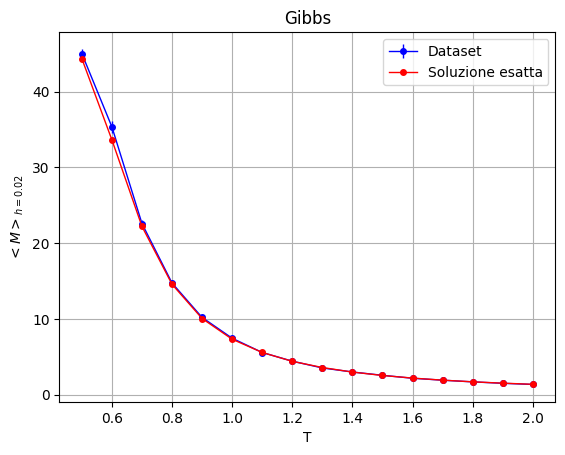

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [1.07084429 2.0531946  0.84275075 0.57437422 0.54162368 0.66708361
 0.06348487 0.13469358 0.49079262 0.08108984 0.26247143 0.23568592
 0.07050773 0.12349857 0.22527013 0.32554039] 


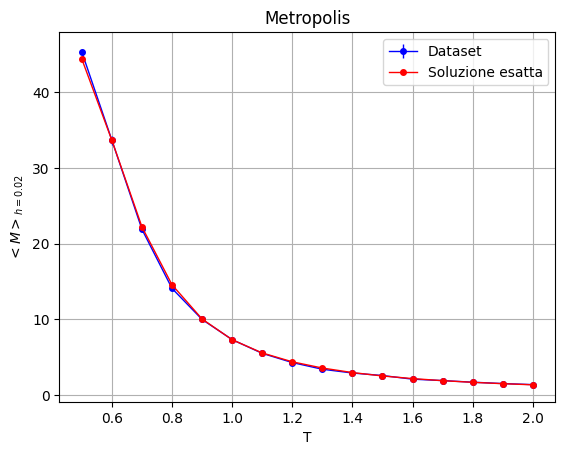

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [2.25830191 0.02621302 1.05499473 1.25554775 0.31296134 0.0764968
 0.37074231 0.86925911 1.87870042 0.98588401 1.05082767 1.54910353
 0.18019277 0.319607   0.27840819 0.62134252] 


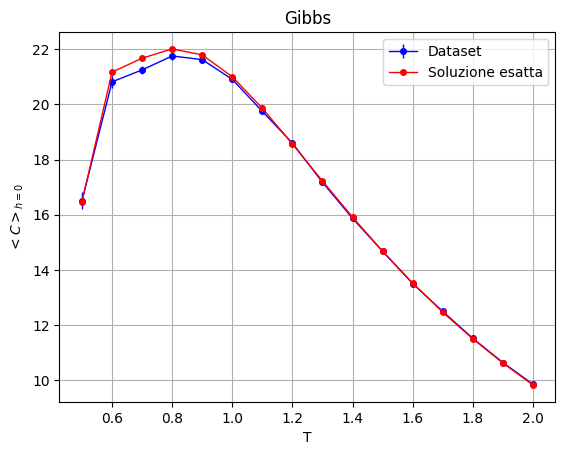

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.12107733 1.58565854 2.83560317 1.78353068 1.74288287 1.09821791
 1.52721182 0.61942054 0.63458721 0.97669276 0.01294836 0.76952813
 1.33527134 1.03106771 0.8387413  1.06017745] 


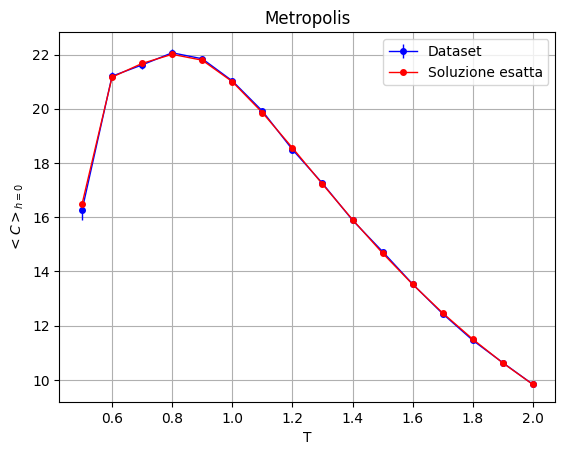

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.60559304 0.22815713 0.33258958 0.39614722 0.47493665 0.31087062
 0.98748751 0.97386839 0.60136413 0.54008074 1.18763406 0.30003781
 0.8057013  1.51998852 0.29985128 0.2357921 ] 


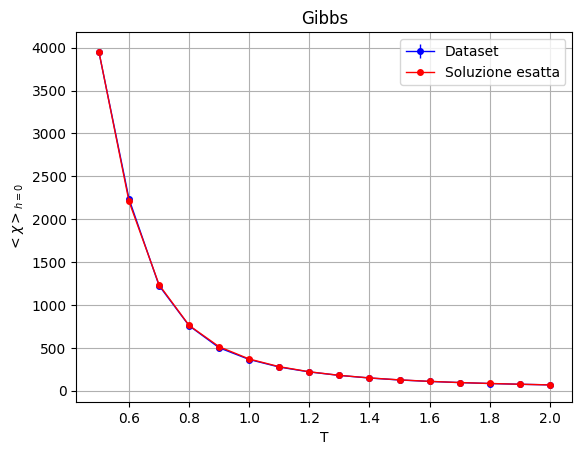

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.10609519 0.68311212 0.44031117 0.23443467 1.56632529 1.56456844
 1.9714703  1.0110031  0.68223313 1.06926079 1.78499702 1.20352162
 1.86521439 1.49383836 0.93902018 0.90681115] 


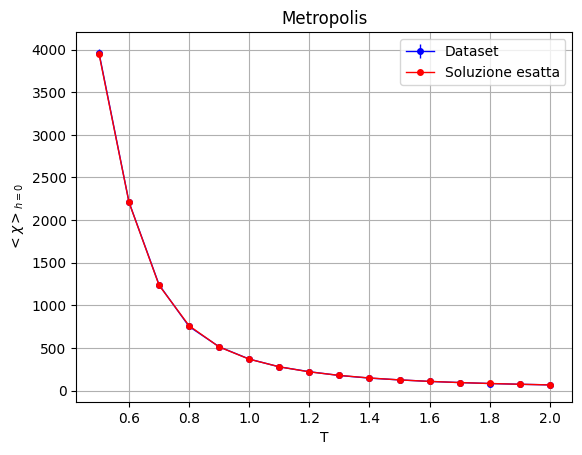

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.28691557 0.09359003 0.37509173 0.86281739 0.37384822 0.52448687
 0.4507888  1.57356998 1.39927282 1.978546   0.13339119 0.4486605
 0.65285119 1.02718664 0.53052596 0.19827214] 


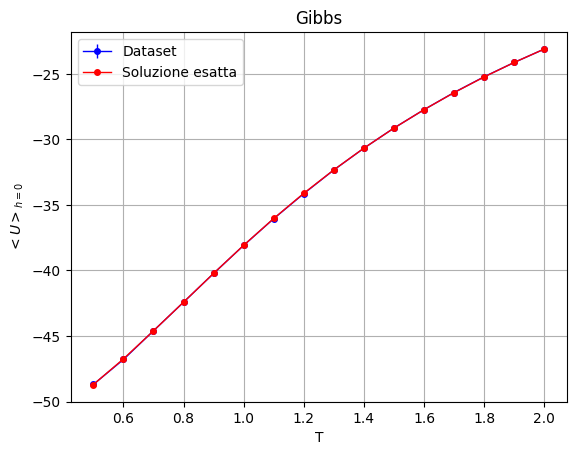

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.22545613 0.86803103 0.00395606 0.11030579 0.13968649 0.36237472
 0.91203311 1.49022609 0.35364384 0.2318095  0.3075473  0.08474745
 0.64648414 1.15687653 0.04631522 0.04402807] 


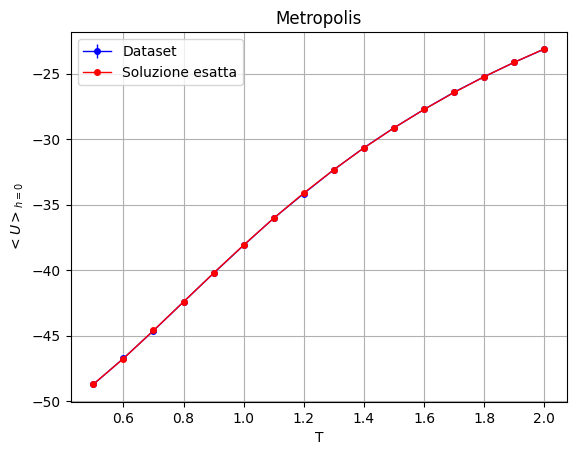

il numero di deviazioni standard di differenza tra dati e valori aspettati sono:
 [0.24931914 0.33099945 0.45080034 0.07717065 0.60507002 1.097411
 0.19002041 2.24333597 0.34227674 0.82236432 0.5029391  0.08644117
 1.20364787 0.45363047 0.28808337 1.3491676 ] 


In [54]:
#da eseguire dopo il salvataggio dati

nblocchi=len(X[0][0][0][0])
# print(len(X[0][0][0][0]))
ntemp=len(temp)
x=[0]*ntemp
y_av=[0]*ntemp
err=[0]*ntemp

simboli=["<M>","<C>","<"+'\chi'+">","<U>"]
_h=["h=0","h=0.02"]
# A: titolo
# B: campo
# C:metodi
# D:temperature

A=0
for i in titol:
	B=0
	for j in camp:
		C=0
		for k in metodi:
			D=0
			for l in temp: # plotto solo la media finale
				x[D]=l 
				y_av[D]=Y_AV[A][B][C][D][nblocchi-1]
				err[D]=ERR[A][B][C][D][nblocchi-1]
				D+=1
			beta = 1/np.array(x)
			J = 1.0
			Ns = 50  #numero di particelle
			th = np.tanh(J/np.array(x))
			thN= th**Ns
			ch = 1/th

			if (_h[B]=="h=0.02" and i=="magnetization") or (_h[B]=="h=0" and i!="magnetization"):
				if (i=="magnetization"):
					h=0.02 #external field
					l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
					l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
					Z = l1**Ns + l2**Ns
					Prop = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
							+ (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)
					Prop=Prop*Ns # voglio confrontare con quello totale
				if (i=="specific_heat"):
					Prop=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
					Prop=Prop*Ns # voglio confrontare con quello totale
				if (i=="susceptibility"):
					Prop = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
					Prop=Prop*Ns  
				if (i=="total_energy"):
					Prop = -J*( th + ch*thN )/( 1 + thN )
					Prop=Prop*Ns  
					y_av=np.array(y_av)*Ns
					err=np.array(err)*Ns
					#poichè mi chiede de plottare l'energia interna del sistema e non quella di una particella
				
				
				plt.errorbar(x, y_av, yerr=err, fmt='o', color='blue', label='Dataset', ls='-', lw=1, markersize=4)
				plt.errorbar(x, Prop, yerr=None, fmt='o', color='red', label='Soluzione esatta', ls='-', lw=1, markersize=4)
				# print(f"\n{np.array(y_av)}\n{Prop}\n{np.array(err)}")
				


				# Aggiunta di legenda, etichette degli assi, etichette sull'asse x
				plt.legend()
				# plt.errorbar(x,y_av,err)
				plt.title(f'{k}')
				plt.xlabel('T')
				plt.ylabel('$'+simboli[A]+'_{'+_h[B]+'}$')
				plt.grid(True)
				plt.show()
				print(f"il numero di deviazioni standard di differenza tra dati e valori aspettati sono:\n {abs((np.array(y_av)-Prop)/np.array(err))} ")

			C+=1
		B+=1
	A+=1

In [40]:
# #da eseguire dopo il salvataggio dati
# print(X)
# conta=2


# #alcuni grafici della magnetizzazione a temperature a caso

# while(conta<16):
# 	print(f"{titol[0]}   {metodi[1]}  {camp[1]}  {temp[conta]}")
# 	plt.errorbar(X[0][1][1][conta],Y_AV[0][1][1][conta],ERR[0][1][1][conta])
# 	plt.xlabel('#blocks')
# 	plt.ylabel('<M>')
# 	plt.grid(True)
# 	plt.show()
# 	conta+=1

In [42]:
# #da eseguire dopo il salvataggio dati

# nblocchi=len(X[0][0][0][0])
# ntemp=len(temp)
# x=[0]*ntemp
# y_av=[0]*ntemp
# err=[0]*ntemp

# simboli=["<M>","<C>","<"+r"\chi"+">","<U>"]
# h=["h=0","h=0.02"]
# # A: titolo
# # B: campo
# # C:metodi
# # D:temperature

# A=0
# for i in titol:
#     B=0
#     for j in camp:
#         C=0
#         for k in metodi:
#             D=0
#             for l in temp: # plotto solo la media finale
#                 x[D]=l 
#                 y_av[D]=Y_AV[A][B][C][D][nblocchi-1]
#                 err[D]=ERR[A][B][C][D][nblocchi-1]
#                 D+=1

#             print(x)
#             print(y_av)
#             print(err)

#             plt.errorbar(x,y_av,err)
#             plt.title(f'{k}')
#             plt.xlabel('T')
#             plt.ylabel(r'$'+simboli[A]+r'_{'+h[B]+r'}$')
#             plt.grid(True)
#             plt.show()
#             C+=1
#         B+=1
#     A+=1